In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [16]:
import tensorflow as tf

# Load MNIST dataset
data_mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data_mnist.load_data()

# Check data distribution
unique_labels, label_counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: {count} data points")


Label 0: 5923 data points
Label 1: 6742 data points
Label 2: 5958 data points
Label 3: 6131 data points
Label 4: 5842 data points
Label 5: 5421 data points
Label 6: 5918 data points
Label 7: 6265 data points
Label 8: 5851 data points
Label 9: 5949 data points


# **Detail Kuis**

## 1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

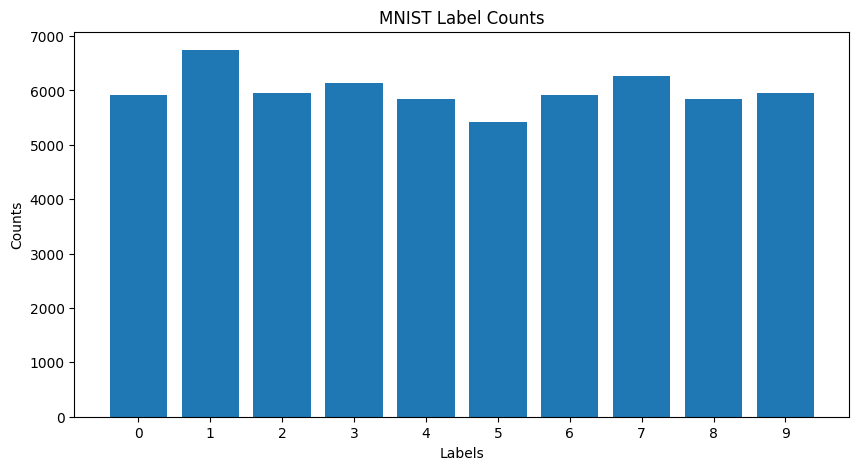

In [17]:
# Tampilkan data
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('MNIST Label Counts')
plt.show()

### Penjelasan:
## Dapat dilihat dari histogram diatas bahwa tidak terdapat imbalance data pada dataset MNIST karena jumlah sampel untuk setiap digit meskipun ada yang tidak sama, tetapi perbedaannya tidak signifikan.

## 2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.


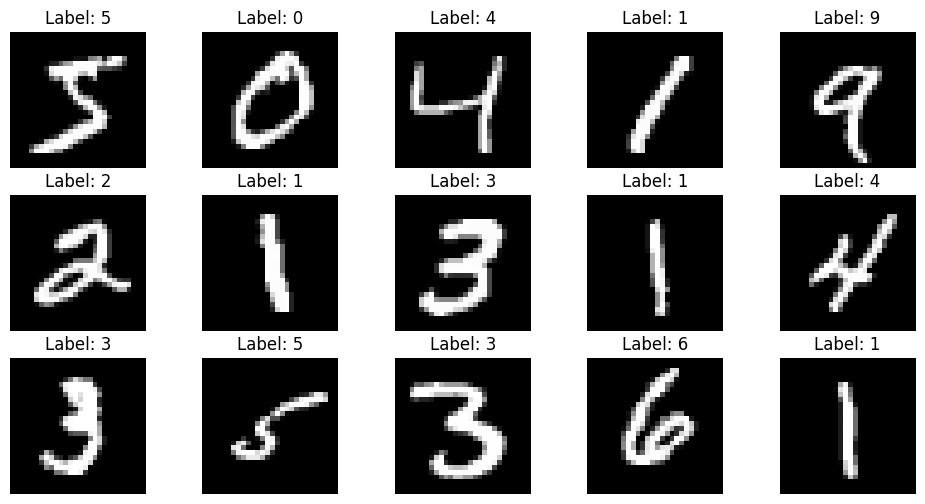

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


## 3.  Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai
fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.

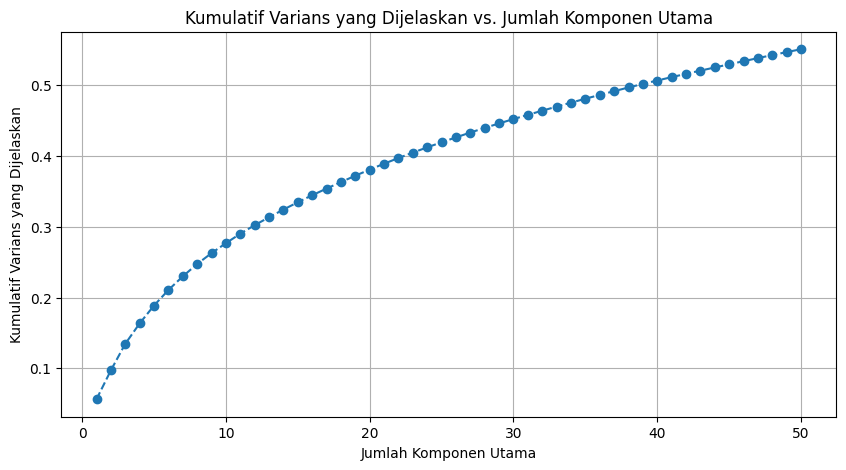

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load MNIST dataset using TensorFlow/Keras
mnist_dataset = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()

# Reshape the data
data = X_train.reshape(X_train.shape[0], -1)

# Standardize the data (mean=0, variance=1)
scaler_data = StandardScaler()
datastd = scaler_data.fit_transform(data)

# Perform PCA with the desired number of components
n_components = 50
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(datastd)

# Display explained variance ratios
variance_ratios = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratios)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1),
         cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.title('Kumulatif Varians yang Dijelaskan vs. Jumlah Komponen Utama')
plt.grid()
plt.show()


## 4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [20]:
from sklearn.model_selection import train_test_split

# Daftar Ukuran Data Uji
test_sizes = [0.3, 0.2, 0.1]

# Inisialisasi daftar kosong untuk menyimpan pembagian data
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

# Initialize y_train_list with the labels from the MNIST dataset
y_train_list.append(y_train)

# Pembagian data latih-uji untuk setiap ukuran data uji
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(pca_data, y_train_list[0], test_size=test_size)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Verifikasi bentuk (shapes) dari himpunan data latih dan uji untuk setiap pembagian (split)
for i, test_size in enumerate(test_sizes):
    print(f"Split {i + 1}:")
    print(f"X_train shape: {X_train_list[i].shape}")
    print(f"y_train shape: {y_train_list[i].shape}")
    print(f"X_test shape: {X_test_list[i].shape}")
    print(f"y_test shape: {y_test_list[i].shape}")
    print()


Split 1:
X_train shape: (42000, 50)
y_train shape: (60000,)
X_test shape: (18000, 50)
y_test shape: (18000,)

Split 2:
X_train shape: (48000, 50)
y_train shape: (42000,)
X_test shape: (12000, 50)
y_test shape: (12000,)

Split 3:
X_train shape: (54000, 50)
y_train shape: (48000,)
X_test shape: (6000, 50)
y_test shape: (6000,)



## 5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

## 6. Evaluasi model yang Anda buat terhadap data training dan data testing.
- Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

## 7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

### Klasifikasi menggunakan algoritma Naive Bayes

In [21]:
# 5. Klasifikasi menggunakan Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Naive Bayes dengan kernel Gaussian
naive_bayes_model = GaussianNB()

# Melatih model pada data pelatihan
naive_bayes_model.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred_naive = naive_bayes_model.predict(X_test)



# 6. Evaluasi Model
akurasi = accuracy_score(y_test, y_pred_naive)
classification_rep = classification_report(y_test, y_pred_naive)
confusion_mtx = confusion_matrix(y_test, y_pred_naive)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 71.65%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       604
           1       0.85      0.92      0.89       683
           2       0.66      0.57      0.61       636
           3       0.83      0.55      0.66       585
           4       0.71      0.82      0.76       574
           5       0.80      0.66      0.72       560
           6       0.95      0.69      0.80       607
           7       0.86      0.48      0.61       591
           8       0.46      0.80      0.58       566
           9       0.60      0.73      0.66       594

    accuracy                           0.72      6000
   macro avg       0.75      0.71      0.71      6000
weighted avg       0.75      0.72      0.72      6000

Matriks Konfusi:
 [[558   0  15   2   1   8   5   1  14   0]
 [  0 630   8   0   2   4   0   2  36   1]
 [ 22   9 363  22  46  12  10   1 141  10]
 [ 30  13  24 323   2  22   2   5 155   9]
 [  0  14  29

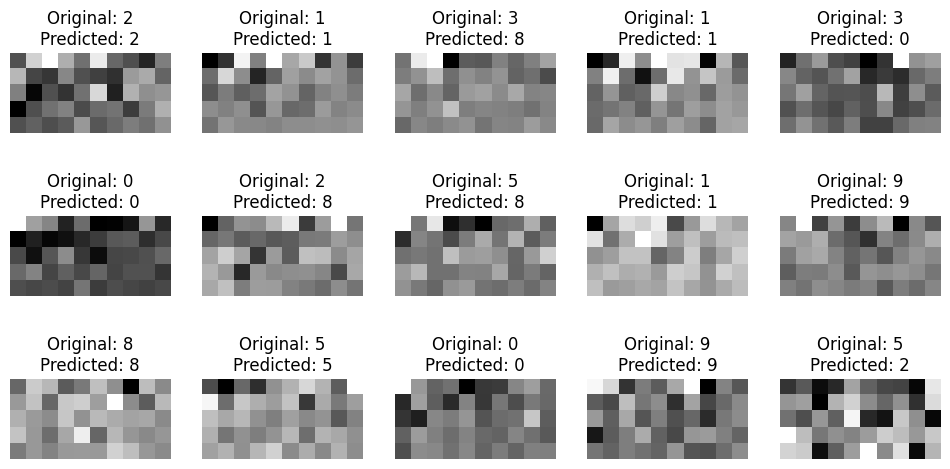

In [22]:
# 7. Menampilkan citra data testing beserta label prediksi
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred_naive[i]}')
    plt.axis('off')

plt.show()

### Klasifikasi menggunakan SVM dengan kernel RBF (Radial Basis Function)

In [23]:
# 5 Klasifikasi menggunakan RBF Kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rbf_kernel = SVC(kernel='rbf')

# Melatih model SVM pada data uji
rbf_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred_rbf = rbf_kernel.predict(X_test)



# 6. Evaluasi model
akurasi = accuracy_score(y_test, y_pred_rbf)
classification_rep = classification_report(y_test, y_pred_rbf)
confusion_mtx = confusion_matrix(y_test, y_pred_rbf)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matrix Konfusi:\n', confusion_mtx)

Akurasi: 97.42%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       604
           1       0.98      0.99      0.98       683
           2       0.97      0.97      0.97       636
           3       0.96      0.96      0.96       585
           4       0.97      0.97      0.97       574
           5       0.99      0.97      0.98       560
           6       0.98      0.99      0.99       607
           7       0.97      0.97      0.97       591
           8       0.96      0.96      0.96       566
           9       0.95      0.96      0.96       594

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Matrix Konfusi:
 [[599   0   1   0   0   0   1   1   1   1]
 [  0 673   5   1   1   0   0   0   1   2]
 [  2   0 617   4   3   0   2   4   2   2]
 [  0   1   5 563   1   0   0   3   9   3]
 [  0   2   4 

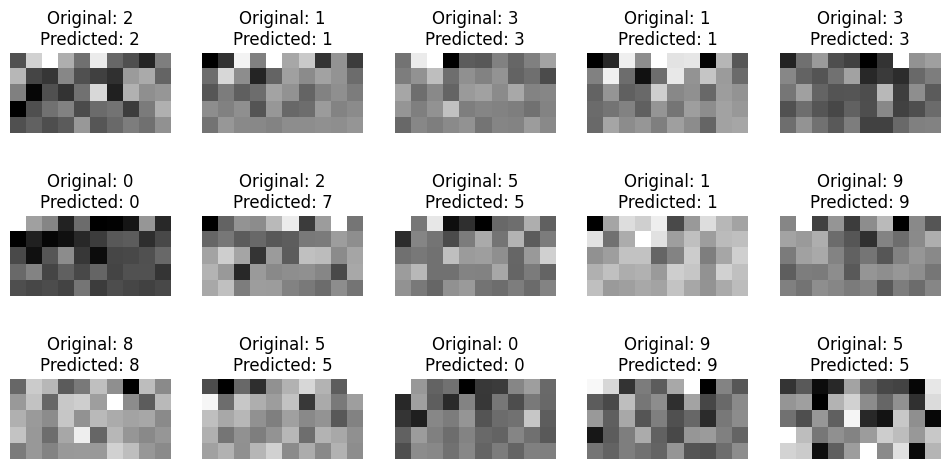

In [24]:
# 7. Menampilkan citra data testing berserta hasil pelabelannya

plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred_rbf[i]}')
    plt.axis('off')

plt.show()

### Klasifikasi menggunakan SVM dengan kernel Polynomial

In [25]:
# 5 Klasifikasi menggunakan Polynomial Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

polynomial_kernel = SVC(kernel='poly', degree=3)

# Melatih model SVM pada data uji
polynomial_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred_poly = polynomial_kernel.predict(X_test)

# 6. Evaluasi Model
akurasi = accuracy_score(y_test, y_pred_poly)
classification_rep = classification_report(y_test, y_pred_poly)
confusion_mtx = confusion_matrix(y_test, y_pred_poly)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 96.75%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       604
           1       0.99      0.99      0.99       683
           2       0.97      0.96      0.96       636
           3       0.96      0.95      0.95       585
           4       0.95      0.97      0.96       574
           5       0.98      0.98      0.98       560
           6       0.99      0.99      0.99       607
           7       0.98      0.96      0.97       591
           8       0.93      0.96      0.94       566
           9       0.94      0.95      0.94       594

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Matriks Konfusi:
 [[595   0   0   0   0   2   0   2   4   1]
 [  0 673   4   1   1   0   0   0   2   2]
 [  1   0 609   4   4   0   0   3  11   4]
 [  1   1   6 555   2   1   0   3  14   2]
 [  0   2   2

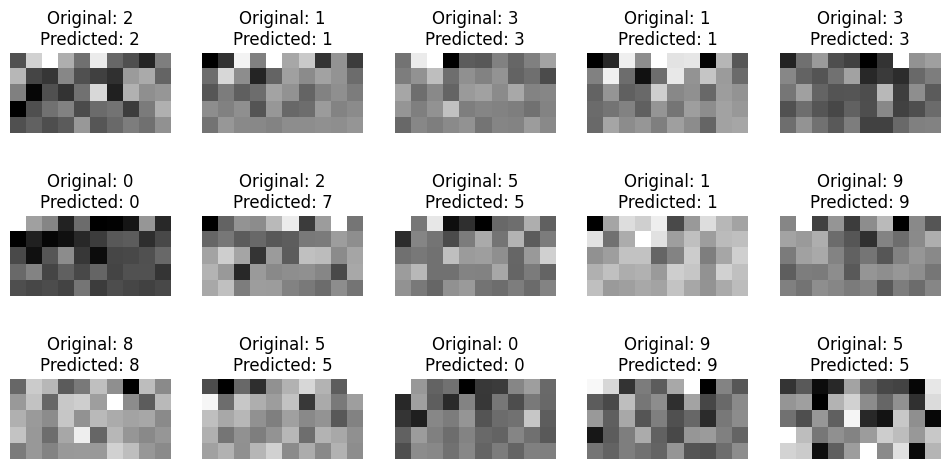

In [26]:
# 7. Menampilkan citra data testing berserta hasil pelabelannya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred_poly[i]}')
    plt.axis('off')

plt.show()

### Klasifikasi menggunakan SVM dengan kernel Linear

In [27]:
# 5. Klasifikasi menggunakan Linear Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

linear_kernel = SVC(kernel='linear')

# Melatih model SVM pada data uji
linear_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred_linear = linear_kernel.predict(X_test)

# 6. Evaluasi Model
akurasi = accuracy_score(y_test, y_pred_linear)
classification_rep = classification_report(y_test, y_pred_linear)
confusion_mtx = confusion_matrix(y_test, y_pred_linear)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 93.02%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       604
           1       0.95      0.98      0.96       683
           2       0.93      0.93      0.93       636
           3       0.89      0.92      0.90       585
           4       0.92      0.94      0.93       574
           5       0.92      0.89      0.90       560
           6       0.96      0.96      0.96       607
           7       0.95      0.93      0.94       591
           8       0.90      0.88      0.89       566
           9       0.91      0.90      0.90       594

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

Matriks Konfusi:
 [[581   0   1   1   0   5  10   2   3   1]
 [  0 668   4   2   1   2   0   0   5   1]
 [  3   5 592   6   6   2   5   4   7   6]
 [  2   3  12 536   1   7   1   5  13   5]
 [  3   3   8

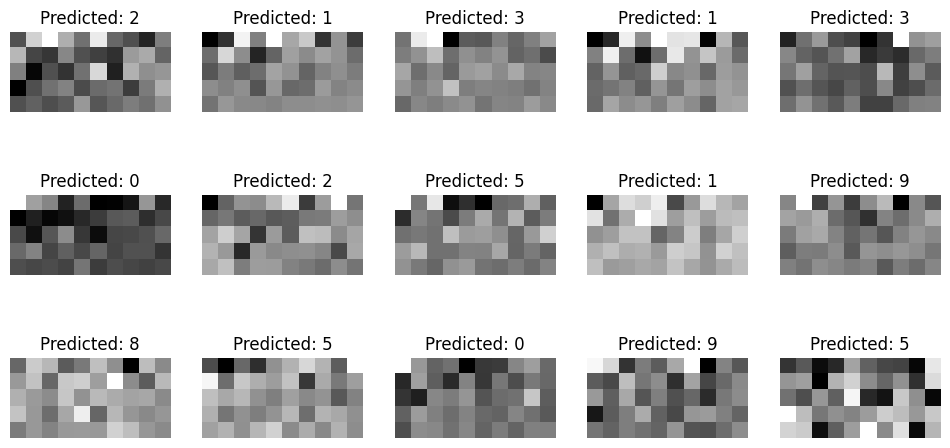

In [28]:
# 7. Menampilkan citra dari data testing
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Predicted: {y_pred_linear[i]}')
    plt.axis('off')

plt.show()

## 8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

Setelah melakukan percobaan dari dataset MNIST menggunakan algoritma Naive Bayes dan algoritma SVM dengan beberapa kernel seperti, RBF kernel, Polynomial kernel, dan Linear kernel. Bahwa untuk akurasi tertinggi menggunakan algoritma SVM dengan RBF kernel yang memiliki akurasi sebesar 97.42%. Dan yang terendah dengan menggunakan algoritma Naive Bayes yang memiliki akurasi sebesar 71.65%. Berikut adalah beberapa penjelasan mengenai penggunaan metode RBF kernel dalam beberapa faktor konfigurasi:

# 1. Kemampuan Kernel RBF untuk Menangani Data Non-Linearnya
Salah satu alasan utama kernel RBF bisa memiliki akurasi yang tinggi adalah kemampuannya dalam menangani data yang memiliki struktur non-linear. Dataset MNIST berisi gambar-gambar digit tulisan tangan, yang bisa memiliki variasi yang sangat tinggi dalam bentuk, ukuran, dan orientasi digit. Oleh karena itu, Kernel RBF ini memiliki fleksibilitas yang tinggi dalam menyesuaikan bentuk berbagai digit dengan baik.

# 2. Parameter Tuning yang Optimal:
Dalam penggunaan SVM, penting untuk menyesuaikan parameter-parameter seperti parameter C dan gamma. Parameter gamma pada kernel RBF mengontrol bentuk fungsi basis radial yang digunakan untuk mengukur jarak antara data. Dalam kasus MNIST, penggunaan parameter gamma yang sesuai dapat meningkatkan kemampuan model untuk menangani perbedaan antara
gambar-gambar digit karena biasanya pengaturan parameter ini dioptimalkan selama eksperimen.

# 3. Kemampuan Generalisasi:
Kernel RBF cenderung memiliki kemampuan generalisasi yang baik, berarti dapat menghasilkan model yang tidak hanya berkinerja baik pada data training tetapi juga pada data testing yang belum pernah dilihat sebelumnya. Hal ini dapat menghasilkan akurasi yang lebih tinggi pada pengujian dataset seperti MNIST.